Import the following librairies and modules

- `pickle`
- `warnings`
- `numpy` as `np`
- `pandas` as `pd`
- `matplotlib.pyplot` as `plt`
- from `sklearn.linear_model` import `LinearRegression`
- from `sklearn.model_selection` import `train_test_split`
- from `sklearn.metrics` import `r2_score` and `mean_absolute_percentage_error`


In [75]:
import pickle
import warnings 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error


In [76]:
# To suppress the warnings in the notebook
warnings.filterwarnings("ignore")

##### Step 0:

- read the csv file `insurance.csv` and store in the variable `df`
- set `header=0`.
- display the first 5 rows.

In [77]:
insurance=pd.read_csv('../data/insurance.csv', header=0)
insurance.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Converting the datatype of `["sex", "smoker", "region"]` columns from `string` to `categorial`.
- Simply execute the following cell.

In [78]:
cols_to_cate = ["sex", "smoker", "region"]

for col in cols_to_cate:
    insurance[col] = insurance[col].astype('category')
    insurance[col] = insurance[col].cat.codes

insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


##### Step 1:
- Check the data health.
    - Are there any missing values? See [hint](https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe)
    - There are no outliers, so we donot have to check for outliers.

In [79]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

##### Step 2:

- Split the data into input variables `X` and target variable `y`.
- Here we would like to predict the healthcare `expenses` of a person based on `age`, `sex`, `bmi`, `children`, `smoker` and `region`, So you have to make 2 dataframes out of dataframe `df`,
    - first, you have to make dataframe `X` with the columns `age`, `sex`, `bmi`, `children`, `smoker` and `region`. Note that `expenses` column should not exist in `X` dataframe. See [Pandas Dataframe drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
    - second, you have to make dataframe `y` having only the column `expenses`. See [Pandas Dataframe filter](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.filter.html)

In [80]:
X=insurance.drop(["expenses"], axis=1)
y=insurance.filter(items=["expenses"])
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


##### Step 3:

We need to split the whole dataset into training subset and test subset. 
- To do so, look at the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and figure out how to use the method `train_test_split` to split the dataset into subsets. 
- Keep `test_size=0.20` as an input/argument to `train_test_split` method. It means that we are keeping 20% of data for test and rest for training.
- Keep `random_state=8` as an input/argument to `train_test_split` method.
- Your output variable should be `X_train`, `X_test`, `y_train`, `y_test`

In [81]:
X.shape, y.shape

((1338, 6), (1338, 1))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070, 1), (268, 1))

##### Step 4:

- Call the model and store in a variable `model`.
- Fit the seen data i.e. `X_train` and `y_train` in it. 

See [Scikit-Learn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Step 5:

To verify if the model works fine on training data (also known as seen data), we need to first predict using `X_train`. See [Scikit-Learn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to find out how to predict.
- Save the result in a variable `y_predict_train`

In [84]:
y_train.head()

,expenses
249,4040.56
1246,9101.80
116,11381.33
968,3279.87
274,2523.17


In [85]:
y_predict_train=model.predict(X_train)
y_predict_train

array([[ 5642.54609001],
       [ 8641.09972738],
       [18232.2742017 ],
       ...,
       [ 1143.0009618 ],
       [ 6471.45400701],
       [ 3981.62825603]])

In [86]:
df_train=pd.DataFrame(index=range(0,len(y_train.index),1))
df_train["y_train"]=y_train["expenses"].values
df_train["y_train_predict"]=y_predict_train.flatten()
df_train.head()

,y_train,y_train_predict
0,4040.56,5642.546090
1,9101.80,8641.099727
2,11381.33,18232.274202
3,3279.87,2954.018557
4,2523.17,3332.662704


<Axes: >

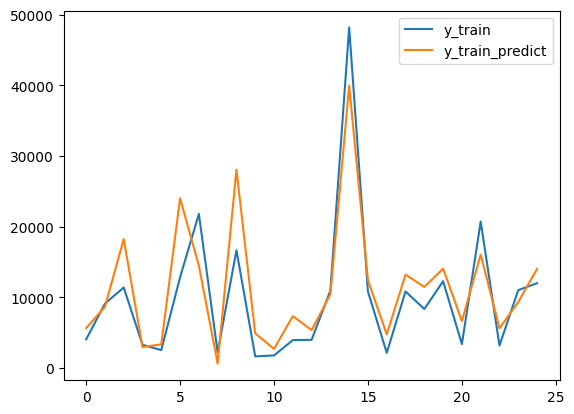

In [87]:
df_train.head(25).plot()

##### Step 6:

- The result `y_predict_train` should be compared with the measured values `y_train` to calculate the error (or score) using an indicator.
- Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). A good R2 score is close to 1, a bad R2 score is close to 0

You have to measure the r2_score. See [Scikit-Learn r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). 
- Remember that `y_true=y_train` and `y_pred=y_predict_train` as input/argument to `r2_score` method.
- You should store the result in a variable `r2_train`

In [88]:
r2_train=r2_score(y_true=y_train, y_pred=y_predict_train)
r2_train

0.7557878679585126

Similarly, you have to measure the `mean_absoulute_percentage_error`. See [Scikit-Learn mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)

- You should store the result in a variable `mape_train`

In [89]:
mape_train=mean_absolute_percentage_error(y_true=y_train, y_pred=y_predict_train)
mape_train

0.3983725466959614

##### Step 7-a:

- predict on unseen data `X_test` subset using the `model` and save it as `y_predict_test`

In [90]:
y_predict_test=model.predict(X_test)


<Axes: >

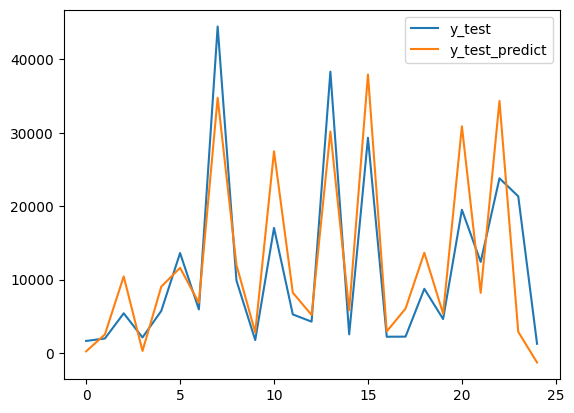

In [91]:
df_test=pd.DataFrame(index=range(0,len(y_test.index),1))
df_test["y_test"]=y_test["expenses"].values
df_test["y_test_predict"]=y_predict_test.flatten()
df_test.head(25).plot()

##### Step 7-b:

- calculate r2 score of `y_test` and `y_predict_test`
- You should store the result in a variable `r2_test`

In [92]:
r2_test=r2_score(y_test,y_predict_test)
r2_test

0.7250840399378324

- calculate mean absolute percentage error of `y_test` and `y_predict_test`
- You should store the result in a variable `mape_test`

In [93]:
mape_test=mean_absolute_percentage_error(y_true=y_test, y_pred=y_predict_test)
mape_test

0.44187059803372414

##### Step 8:

- Compare `r2_train` and `r2_test`, what do you think about model? Is it best, good, fine, bad or worst? Write your answer in a markdown below.

- Compare `mape_train` and `mape_test`, what do you think about model? Is it best, good, fine, bad or worst? Write your answer in a markdown below.

- Looking at both indicators and their comparison that you made just above, what is your conclusion about the model. Is it marketable? Write your answer in a markdown below.

##### Step 9:

Save the model with filename `model_multiple_linear_regression.pkl`. You can use it anytime later.

In [94]:
with open('../models/model_multiple_linear_regression.pkl', 'wb') as f:
    pickle.dump(model, f)

##### Real World Use-Case:

Now that you have trained the model on `X_train` and tested internally yourself using `X_test`, let us test it on real-world use-case.

- read the csv file `insurance_rwi.csv` and store in the variable `X_rwi`
- set `header=0`.
- display the first 5 rows.

In [102]:
X_rwi=pd.read_csv('../data/real_world_implementation/insurance_rwi.csv', header=0,index_col=0)
X_rwi.head()

,age,sex,bmi,children,smoker,region
0,40,female,29.8,1,no,southeast
1,30,male,31.6,3,no,southeast
2,29,female,31.2,0,no,northeast
3,36,male,29.7,0,no,southeast
4,41,female,31.0,0,no,southeast


- Check the data health.
    - Are there any missing values?

In [103]:
X_rwi.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Converting the datatype of `["sex", "smoker", "region"]` columns from `string` to `categorial`.
- Hint : you did it above

In [104]:
str_cat=["sex","smoker","region"]
for col in str_cat:
    X_rwi[col] = X_rwi[col].astype('category')
    X_rwi[col] = X_rwi[col].cat.codes

X_rwi.head()

,age,sex,bmi,children,smoker,region
0,40,0,29.8,1,0,2
1,30,1,31.6,3,0,2
2,29,0,31.2,0,0,0
3,36,1,29.7,0,0,2
4,41,0,31.0,0,0,2


Load the saved model `model_multiple_linear_regression.pkl` and store it in variable `loaded_model`. 

- See [Loading models with pickle](https://www.geeksforgeeks.org/-and-load-machine-learning-models-in-python-with-scikit-learn/) and look under the comment **load the model** 

In [105]:
# load_model = pickle.load(open('../data/real_world_implementation/insurance_rwi.csv', 'rb'))

Now the easiest part. repeat step 7-a, however instead of `X_test`, you have to predict on `X_rwi` and store the results in a variable `y_predict_rwi`

In [106]:
y_predict_rwi = model.predict(X_rwi)

In [107]:
X_rwi["predicted_expenses"] = y_predict_rwi

Display the first `20` rows of dataframe `X_rwi`. What do you think of predicted values? Write your answer in a markdown below.

In [109]:
X_rwi.head(20)

,age,sex,bmi,children,smoker,region,predicted_expenses
0,40,0,29.8,1,0,2,8152.633767
1,30,1,31.6,3,0,2,6762.258901
2,29,0,31.2,0,0,0,6086.704643
3,36,1,29.7,0,0,2,6459.013037
4,41,0,31.0,0,0,2,8358.963420
5,44,0,43.9,2,1,2,38448.263460
6,45,1,21.4,0,0,1,6638.779494
7,55,0,40.8,3,0,2,16343.807043
8,60,1,31.4,3,1,1,39393.766267
9,56,1,36.1,3,0,3,14555.937311
